In [44]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

In [45]:
df = pd.read_csv('../../Data/Raw/Entity_Count_Flag_dataframe.csv')
df.head()

C:\Users\kaitl\AppData\Local\Temp\ipykernel_33208\2757480640.py:1: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../../Data/Raw/Entity_Count_Flag_dataframe.csv')


,reviewDate,reviewID,reviewerID,reviewContent,reviewRating,reviewUsefulCount,reviewCoolCount,reviewFunnyCount,restaurantID,flagged,...,NRP_count,LOCATION_count,PERSON_count,PHONE_NUMBER_count,DATE_TIME_flag,EMAIL_ADDRESS_flag,NRP_flag,LOCATION_flag,PERSON_flag,PHONE_NUMBER_flag
0,9/22/2012,GtwU21YOQn-wf4vWRUIx6w,bNYesZ944s6IJVowOnB0iA,"Unlike Next, which we'd eaten at the previous ...",5,0,0,0,pbEiXam9YJL3neCYHGwLUA,N,...,1,0,4,0,True,False,True,False,True,False
1,9/22/2012,0LpVTc3,TRKxLC3y-ZvP45e5iilMtw,Probably one of the best meals I've had ever. ...,5,0,0,0,pbEiXam9YJL3neCYHGwLUA,N,...,0,0,1,0,True,False,False,False,True,False
2,9/19/2012,tljtLzf68Fkwf,0EMm8umAqXZzyhxNpL4M9g,Service was impeccable. Experience and present...,3,2,0,0,pbEiXam9YJL3neCYHGwLUA,N,...,0,0,0,0,False,False,False,False,False,False
3,9/6/2012,iSN,DlwexC7z88ymAzu45skODw,"The problem with places like this, given the e...",3,8,0,3,pbEiXam9YJL3neCYHGwLUA,N,...,0,0,2,0,True,False,False,False,True,False
4,9/9/2012,Jmwrh7,kW2dk1CWihmh3g7k9N2G8A,I have no idea how to write my review - dining...,5,1,2,0,pbEiXam9YJL3neCYHGwLUA,N,...,1,1,0,0,True,False,True,True,False,False


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26956 entries, 0 to 26955
Data columns (total 44 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   reviewDate               26956 non-null  object 
 1   reviewID                 26955 non-null  object 
 2   reviewerID               26956 non-null  object 
 3   reviewContent            26956 non-null  object 
 4   reviewRating             26956 non-null  int64  
 5   reviewUsefulCount        26956 non-null  int64  
 6   reviewCoolCount          26956 non-null  int64  
 7   reviewFunnyCount         26956 non-null  int64  
 8   restaurantID             26956 non-null  object 
 9   flagged                  26956 non-null  object 
 10  reviewerName             26956 non-null  object 
 11  reviewerLocation         26947 non-null  object 
 12  reviewerYelpJoinDate     26956 non-null  object 
 13  reviewerFriendCount      26956 non-null  int64  
 14  reviewerNumReviews    

In [47]:
df.nunique()

reviewDate                  2427
reviewID                   26955
reviewerID                 16675
reviewContent              26938
reviewRating                   5
reviewUsefulCount             32
reviewCoolCount               32
reviewFunnyCount              30
restaurantID                 121
flagged                        2
reviewerName               12931
reviewerLocation            1483
reviewerYelpJoinDate          96
reviewerFriendCount          385
reviewerNumReviews           575
reviewerFirstCount           575
reviewerUsefulCount          765
reviewerCoolCount            600
reviewerFunnyCount           546
reviewerComplimentCount      473
reviewerTipCount             246
reviewerFanCount             115
resLocation                  121
resName                      120
resReviewCount               105
resRating                      4
DATE_TIME                   8769
EMAIL_ADDRESS                  1
NRP                         1480
LOCATION                    2738
PERSON    

In [48]:
df.describe()

,reviewRating,reviewUsefulCount,reviewCoolCount,reviewFunnyCount,reviewerFriendCount,reviewerNumReviews,reviewerFirstCount,reviewerUsefulCount,reviewerCoolCount,reviewerFunnyCount,...,reviewerTipCount,reviewerFanCount,resReviewCount,resRating,DATE_TIME_count,EMAIL_ADDRESS_count,NRP_count,LOCATION_count,PERSON_count,PHONE_NUMBER_count
count,26956.000000,26956.000000,26956.000000,26956.000000,26956.000000,26956.000000,26956.000000,26956.000000,26956.000000,26956.000000,...,26956.000000,26956.000000,26956.000000,26956.000000,26956.000000,26956.000000,26956.000000,26956.000000,26956.000000,26956.000000
mean,3.936192,0.728038,0.452256,0.378765,47.708043,93.838069,93.838069,207.040399,143.891453,118.208228,...,10.377801,5.697544,682.513392,3.948657,1.061174,0.000037,0.315885,0.464720,0.221027,0.000074
std,1.154769,1.853664,1.481294,1.459130,220.801472,208.992691,208.992691,969.979165,793.479383,642.400688,...,59.645097,32.160259,313.638374,0.226589,1.588777,0.006091,0.803795,0.948213,0.728290,0.008613
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,8.000000,3.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000,0.000000,6.000000,6.000000,2.000000,1.000000,0.000000,...,0.000000,0.000000,444.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,0.000000,0.000000,5.000000,23.000000,23.000000,16.000000,5.000000,5.000000,...,0.000000,0.000000,606.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.000000,1.000000,0.000000,0.000000,27.000000,88.000000,88.000000,85.000000,37.000000,31.000000,...,1.000000,2.000000,880.000000,4.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,5.000000,49.000000,50.000000,52.000000,4706.000000,2611.000000,2611.000000,21748.000000,19697.000000,17929.000000,...,2166.000000,640.000000,2122.000000,5.000000,24.000000,1.000000,15.000000,15.000000,19.000000,1.000000


In [51]:
df['flagged'] = df['flagged'].replace({"Y": 1, "N": 0})
df['PHONE_NUMBER'] = df['PHONE_NUMBER'].replace({True: 1, False: 0})
df['EMAIL_ADDRESS_count'] = df['EMAIL_ADDRESS_count'].replace({True: 1, False: 0})
df['PHONE_NUMBER_count'] = df['PHONE_NUMBER_count'].replace({True: 1, False: 0})
df['DATE_TIME_flag'] = df['DATE_TIME_flag'].replace({True: 1, False: 0})
df['EMAIL_ADDRESS_flag'] = df['EMAIL_ADDRESS_flag'].replace({True: 1, False: 0})
df['NRP_flag'] = df['NRP_flag'].replace({True: 1, False: 0})
df['LOCATION_flag'] = df['LOCATION_flag'].replace({True: 1, False: 0})
df['PERSON_flag'] = df['PERSON_flag'].replace({True: 1, False: 0})
df['PHONE_NUMBER_flag'] = df['PHONE_NUMBER_flag'].replace({True: 1, False: 0})
df.head()

,reviewDate,reviewID,reviewerID,reviewContent,reviewRating,reviewUsefulCount,reviewCoolCount,reviewFunnyCount,restaurantID,flagged,...,NRP_count,LOCATION_count,PERSON_count,PHONE_NUMBER_count,DATE_TIME_flag,EMAIL_ADDRESS_flag,NRP_flag,LOCATION_flag,PERSON_flag,PHONE_NUMBER_flag
0,9/22/2012,GtwU21YOQn-wf4vWRUIx6w,bNYesZ944s6IJVowOnB0iA,"Unlike Next, which we'd eaten at the previous ...",5,0,0,0,pbEiXam9YJL3neCYHGwLUA,0,...,1,0,4,0,1,0,1,0,1,0
1,9/22/2012,0LpVTc3,TRKxLC3y-ZvP45e5iilMtw,Probably one of the best meals I've had ever. ...,5,0,0,0,pbEiXam9YJL3neCYHGwLUA,0,...,0,0,1,0,1,0,0,0,1,0
2,9/19/2012,tljtLzf68Fkwf,0EMm8umAqXZzyhxNpL4M9g,Service was impeccable. Experience and present...,3,2,0,0,pbEiXam9YJL3neCYHGwLUA,0,...,0,0,0,0,0,0,0,0,0,0
3,9/6/2012,iSN,DlwexC7z88ymAzu45skODw,"The problem with places like this, given the e...",3,8,0,3,pbEiXam9YJL3neCYHGwLUA,0,...,0,0,2,0,1,0,0,0,1,0
4,9/9/2012,Jmwrh7,kW2dk1CWihmh3g7k9N2G8A,I have no idea how to write my review - dining...,5,1,2,0,pbEiXam9YJL3neCYHGwLUA,0,...,1,1,0,0,1,0,1,1,0,0


In [52]:
missing_values = df.isnull().sum()

# Print the columns with missing values
print('Columns with missing values:')
print(missing_values[missing_values > 0])

Columns with missing values:
reviewID                1
reviewerLocation        9
DATE_TIME           13641
EMAIL_ADDRESS       26955
NRP                 21593
LOCATION            19120
PERSON              23195
PHONE_NUMBER        26954
dtype: int64


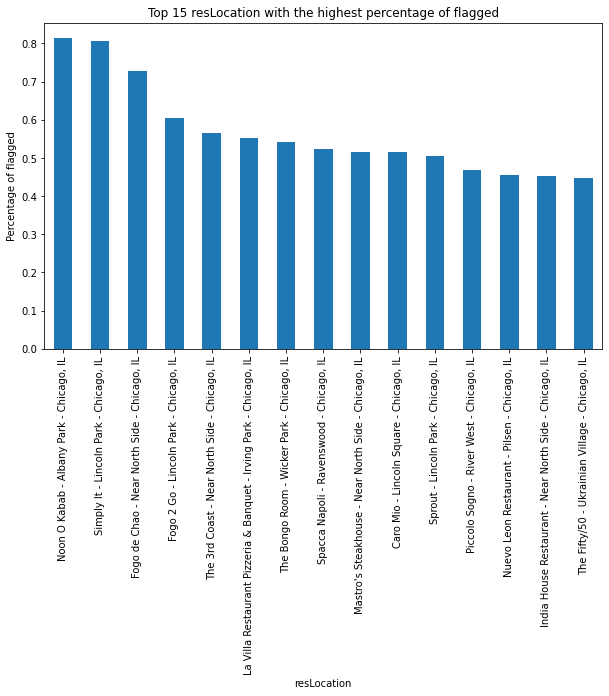

In [65]:
grouped = df.groupby('resLocation')['flagged'].mean().sort_values(ascending=False).head(15)

plt.figure(figsize=(10,6))
grouped.plot(kind='bar')
plt.ylabel('Percentage of flagged')
plt.title('Top 15 resLocation with the highest percentage of flagged')
plt.show()

In [56]:
df['reviewerYelpJoinDate'] = pd.to_datetime(df['reviewerYelpJoinDate'])
df['reviewDate'] = pd.to_datetime(df['reviewDate'])

# Calculate the difference
df['date_diff_joinedandreviewed'] = (df['reviewDate'] - df['reviewerYelpJoinDate']).dt.days

Text(0.5, 0.98, 'Time Difference vs Fraud Class')

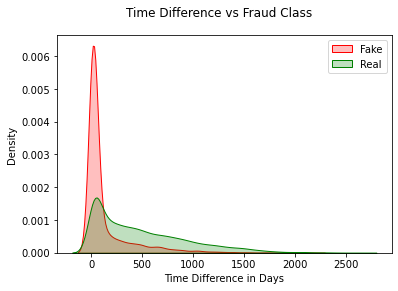

In [60]:
fig, ax = plt.subplots()

sns.kdeplot(df[df["flagged"]==1]["date_diff_joinedandreviewed"], shade=True, color="red", label="Fake", ax=ax)
sns.kdeplot(df[df["flagged"]==0]["date_diff_joinedandreviewed"], shade=True, color="green", label="Real", ax=ax)

ax.set_xlabel("Time Difference in Days")
ax.set_ylabel("Density")
plt.legend() 

fig.suptitle("Time Difference vs Fraud Class")

Text(0.5, 0.98, 'Num of Reviews vs Fraud Class')

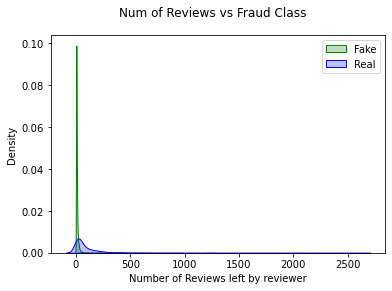

In [67]:
fig, ax = plt.subplots()

sns.kdeplot(df[df["flagged"]==1]["reviewerNumReviews"], shade=True, color="green", label="Fake", ax=ax)
sns.kdeplot(df[df["flagged"]==0]["reviewerNumReviews"], shade=True, color="blue", label="Real", ax=ax)

ax.set_xlabel("Number of Reviews left by reviewer")
ax.set_ylabel("Density")
plt.legend() 

fig.suptitle("Num of Reviews vs Fraud Class")

Text(0.5, 0.98, 'Num of Reviews for restaurant vs Fraud Class')

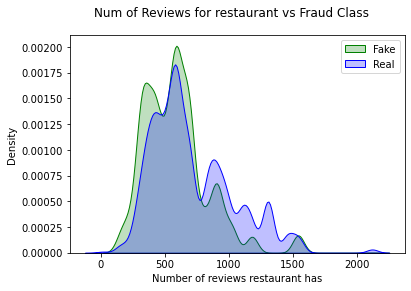

In [69]:
fig, ax = plt.subplots()

sns.kdeplot(df[df["flagged"]==1]["resReviewCount"], shade=True, color="green", label="Fake", ax=ax)
sns.kdeplot(df[df["flagged"]==0]["resReviewCount"], shade=True, color="blue", label="Real", ax=ax)

ax.set_xlabel("Number of reviews restaurant has")
ax.set_ylabel("Density")
plt.legend() 

fig.suptitle("Num of Reviews for restaurant vs Fraud Class")

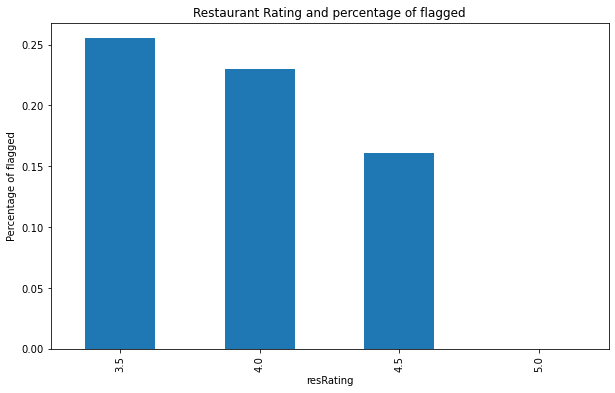

In [72]:
grouped = df.groupby('resRating')['flagged'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,6))
grouped.plot(kind='bar')
plt.ylabel('Percentage of flagged')
plt.title('Restaurant Rating and percentage of flagged')
plt.show()